In [5]:
import pandas as pd

# Load the CSV
users_df = pd.read_csv('users.csv')

# Show first few rows
print(users_df.head())


   id  username  password    tier  balance
0   1  testuser  testpass    Gold  1000.00
1   2     alice  al!ce123  Silver   750.50
2   3       bob   b0b!321  Bronze   300.00
3   4   charlie   charl!e    Gold  1200.00
4   5     diana  d1@n@123  Silver   540.25


In [7]:
# Basic info
print(users_df.info())

# Summary statistics
print(users_df.describe())

# Value counts for 'tier'
print(users_df['tier'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        10 non-null     int64  
 1   username  10 non-null     object 
 2   password  10 non-null     object 
 3   tier      10 non-null     object 
 4   balance   10 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 532.0+ bytes
None
             id      balance
count  10.00000    10.000000
mean    5.50000   848.210000
std     3.02765   499.072161
min     1.00000   250.000000
25%     3.25000   450.625000
50%     5.50000   815.250000
75%     7.75000  1150.000000
max    10.00000  1800.000000
tier
Gold      4
Silver    3
Bronze    3
Name: count, dtype: int64


In [9]:
from sklearn.preprocessing import LabelEncoder

# Drop non-numeric, non-predictive fields
users_ml = users_df.drop(['username', 'password'], axis=1)

# Encode 'tier' (e.g., Gold=2, Silver=1, Bronze=0)
le = LabelEncoder()
users_ml['tier'] = le.fit_transform(users_ml['tier'])

print(users_ml.head())


   id  tier  balance
0   1     1  1000.00
1   2     2   750.50
2   3     0   300.00
3   4     1  1200.00
4   5     2   540.25


In [11]:
from sklearn.model_selection import train_test_split

X = users_ml.drop('tier', axis=1)
y = users_ml['tier']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.5


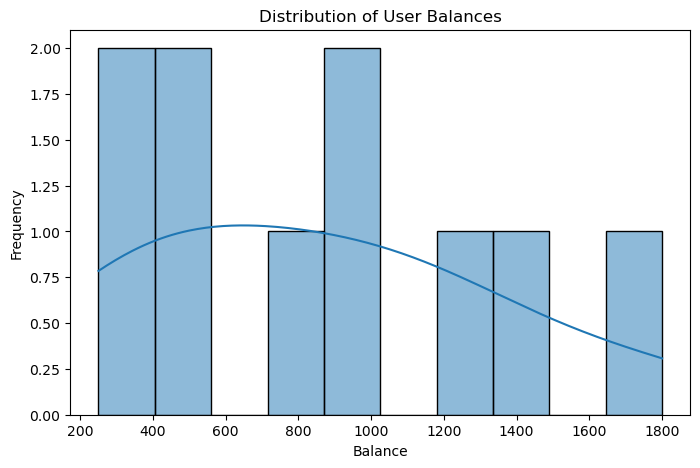

C:\Users\acer\AppData\Local\Temp\ipykernel_18188\921265361.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=users_df, x='tier', palette='Set2')


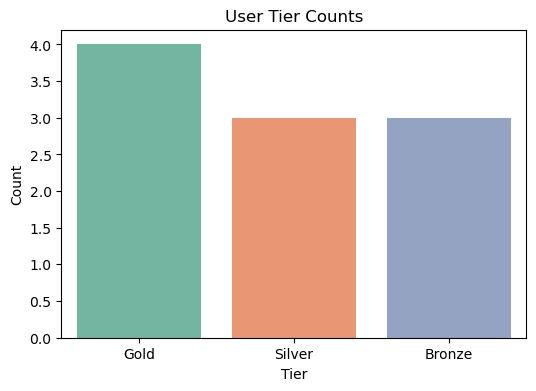

C:\Users\acer\AppData\Local\Temp\ipykernel_18188\921265361.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=users_df, x='tier', y='balance', palette='Set3')


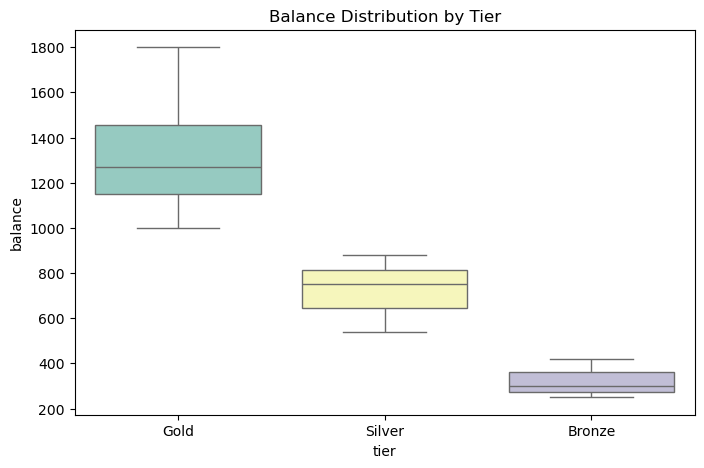

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
users_df = pd.read_csv('users.csv')

# Plot distribution of balance
plt.figure(figsize=(8, 5))
sns.histplot(users_df['balance'], bins=10, kde=True)
plt.title("Distribution of User Balances")
plt.xlabel("Balance")
plt.ylabel("Frequency")
plt.show()

# Count of each account tier
plt.figure(figsize=(6, 4))
sns.countplot(data=users_df, x='tier', palette='Set2')
plt.title("User Tier Counts")
plt.xlabel("Tier")
plt.ylabel("Count")
plt.show()

# Balance by tier
plt.figure(figsize=(8, 5))
sns.boxplot(data=users_df, x='tier', y='balance', palette='Set3')
plt.title("Balance Distribution by Tier")
plt.show()


In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Encode 'tier'
df = users_df.copy()
df['tier'] = LabelEncoder().fit_transform(df['tier'])

# Features: use 'tier' and 'id'
X = df[['id', 'tier']]  # You can include more features later
y = df['balance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Linear Regression R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


Linear Regression R²: -66.00152768522688
MSE: 280908.09241579403


In [21]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train, y_train)

y_knn_pred = knn_reg.predict(X_test)

print("KNN Regression R²:", r2_score(y_test, y_knn_pred))
print("MSE:", mean_squared_error(y_test, y_knn_pred))


KNN Regression R²: -11.06684552174899
MSE: 50591.00402777775


In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Predict tier using balance
X_cls = df[['balance']]
y_cls = df['tier']

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

knn_cls = KNeighborsClassifier(n_neighbors=3)
knn_cls.fit(X_train_cls, y_train_cls)

y_pred_cls = knn_cls.predict(X_test_cls)

from sklearn.metrics import accuracy_score
print("KNN Classification Accuracy:", accuracy_score(y_test_cls, y_pred_cls))


KNN Classification Accuracy: 0.0
